In [10]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import pandas as pd
from IPython.display import display
import re 

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split

from bs4 import BeautifulSoup
from datetime import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
df = pd.read_csv('../datasets_processed/train_processed_2.csv')
print(df.head(5))

   Id  Popularity                                       Page content  \
0   0          -1  <html><head><div class="article-info"> <span c...   
1   1           1  <html><head><div class="article-info"><span cl...   
2   2           1  <html><head><div class="article-info"><span cl...   
3   3          -1  <html><head><div class="article-info"><span cl...   
4   4          -1  <html><head><div class="article-info"><span cl...   

   img_count  link_count                                              title  \
0          1          22  ['nasa', 'grand', 'challenge', 'stop', 'astero...   
1          2          18  ['google', 'new', 'open', 'sourc', 'patent', '...   
2          2          11  ['ballin', 'nfl', 'draft', 'pick', 'get', 'cho...   
3          1          13  ['cameraperson', 'fail', 'deliv', 'slapstick',...   
4         52          16  ['nfl', 'star', 'help', 'young', 'fan', 'prove...   

   title_word_count  title_bit_count  \
0                 8               53   
1           

Popularity                  -1           1   total
content_word_count                                
0                    51.719577   48.280423   756.0
100                  51.696248   48.303752  4451.0
200                  51.288510   48.711490  5161.0
300                  50.763655   49.236345  3863.0
400                  51.288566   48.711434  2755.0
500                  50.402504   49.597496  2236.0
600                  48.996458   51.003542  1694.0
700                  50.341530   49.658470  1464.0
800                  49.019608   50.980392  1173.0
900                  49.742533   50.257467   971.0
1000                 52.761628   47.238372   688.0
1100                 50.294695   49.705305   509.0
1200                 49.066667   50.933333   375.0
1300                 47.524752   52.475248   303.0
1400                 47.787611   52.212389   226.0
1500                 47.894737   52.105263   190.0
1600                 55.405405   44.594595   148.0
1700                 49.253731 

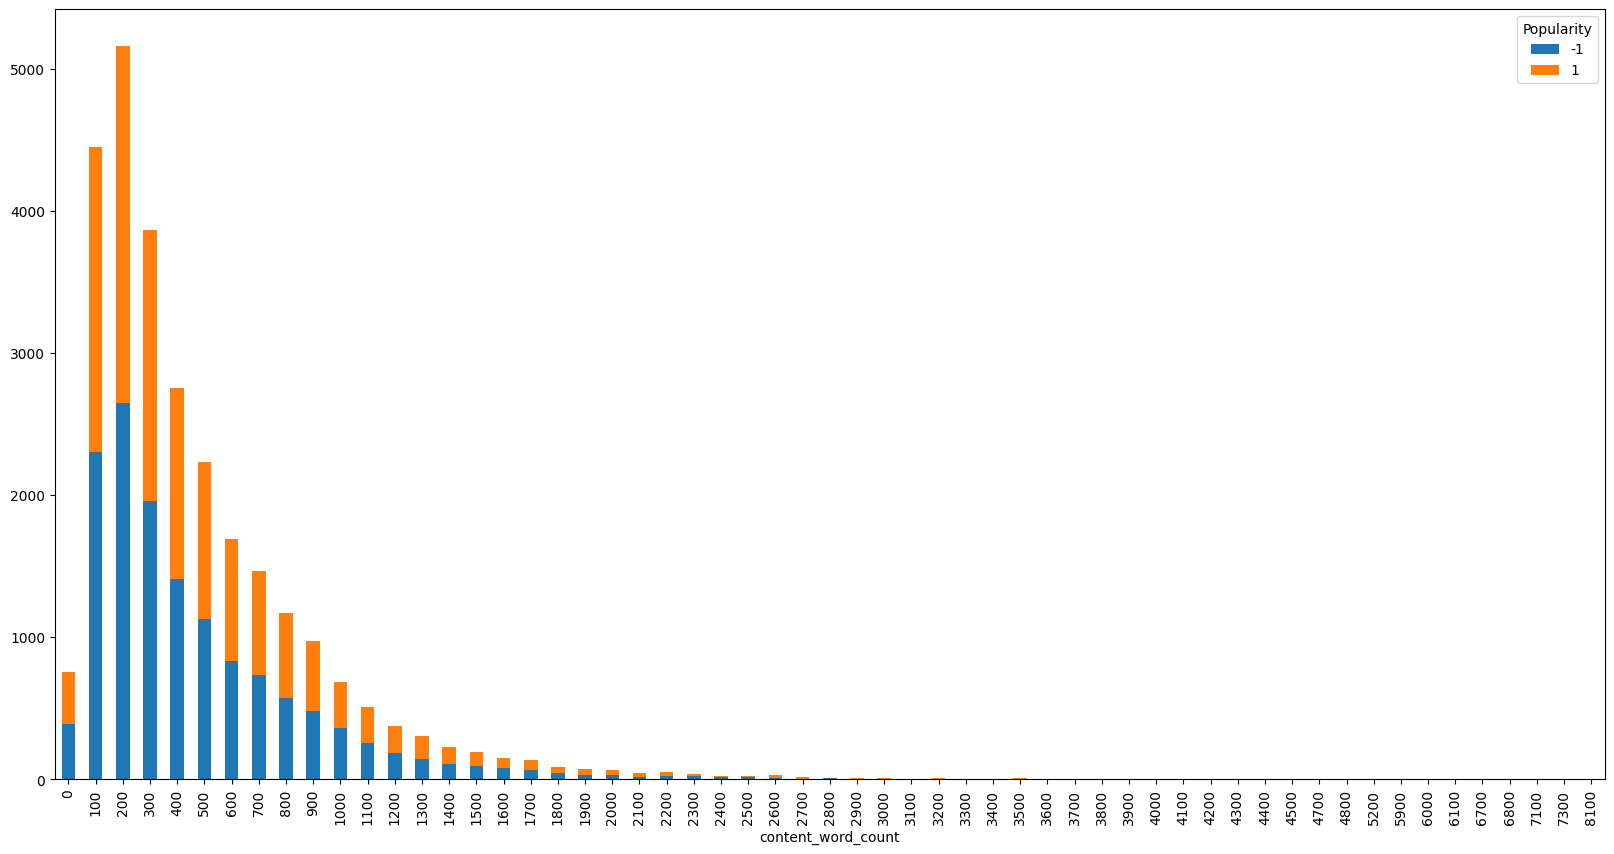

In [12]:
df['content_word_count'] = df['content_word_count'] // 100 * 100
group = df.groupby(['content_word_count', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['content_word_count', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity                -1           1   total
title_word_count                                
2                        NaN  100.000000     1.0
3                  35.000000   65.000000    20.0
4                  52.173913   47.826087   184.0
5                  47.707559   52.292441   807.0
6                  50.283944   49.716056  1937.0
7                  48.720000   51.280000  3750.0
8                  49.754179   50.245821  5085.0
9                  51.870278   48.129722  5427.0
10                 52.172954   47.827046  4533.0
11                 49.804560   50.195440  3070.0
12                 53.136095   46.863905  1690.0
13                 50.744249   49.255751   739.0
14                 52.434457   47.565543   267.0
15                 50.980392   49.019608   102.0
16                 61.111111   38.888889    18.0
17                 44.444444   55.555556     9.0
18                 66.666667   33.333333     3.0
20                100.000000         NaN     1.0


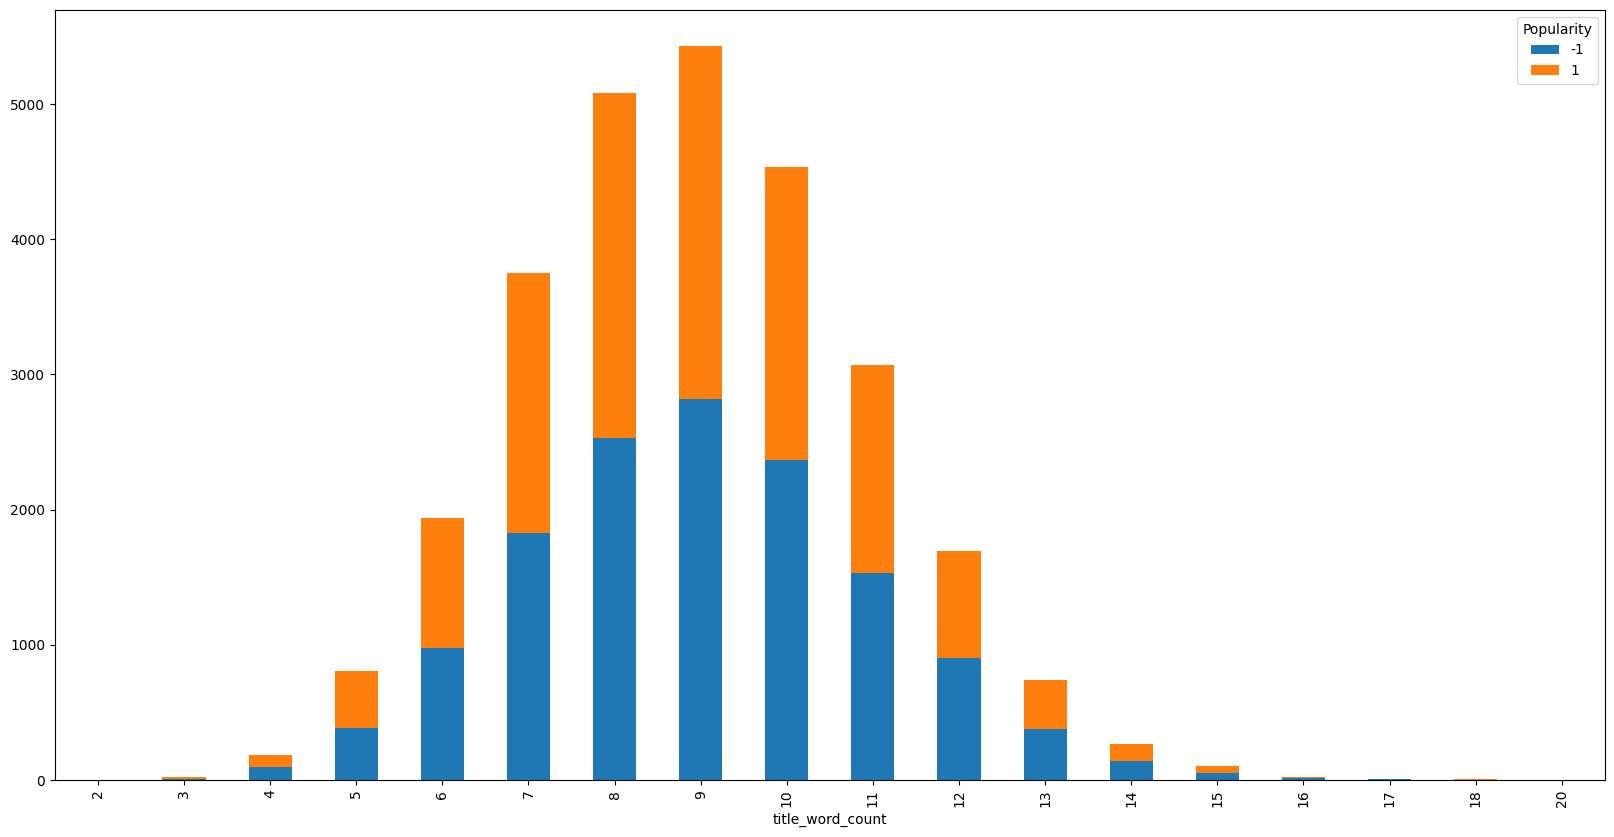

In [13]:
group = df.groupby(['title_word_count', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['title_word_count', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity           -1           1   total
content_len                                
0             51.702509   48.297491  3348.0
1000          51.233799   48.766201  8024.0
2000          50.906316   49.093684  5241.0
3000          50.668944   49.331056  3513.0
4000          49.755700   50.244300  2456.0
5000          49.212598   50.787402  1778.0
6000          51.365639   48.634361  1135.0
7000          50.153374   49.846626   652.0
8000          49.648712   50.351288   427.0
9000          47.222222   52.777778   288.0
10000         49.302326   50.697674   215.0
11000         44.444444   55.555556   153.0
12000         45.098039   54.901961   102.0
13000         43.529412   56.470588    85.0
14000         56.250000   43.750000    48.0
15000         53.703704   46.296296    54.0
16000         44.444444   55.555556    27.0
17000         37.037037   62.962963    27.0
18000         12.500000   87.500000     8.0
19000         36.363636   63.636364    11.0
20000         28.571429   71.428

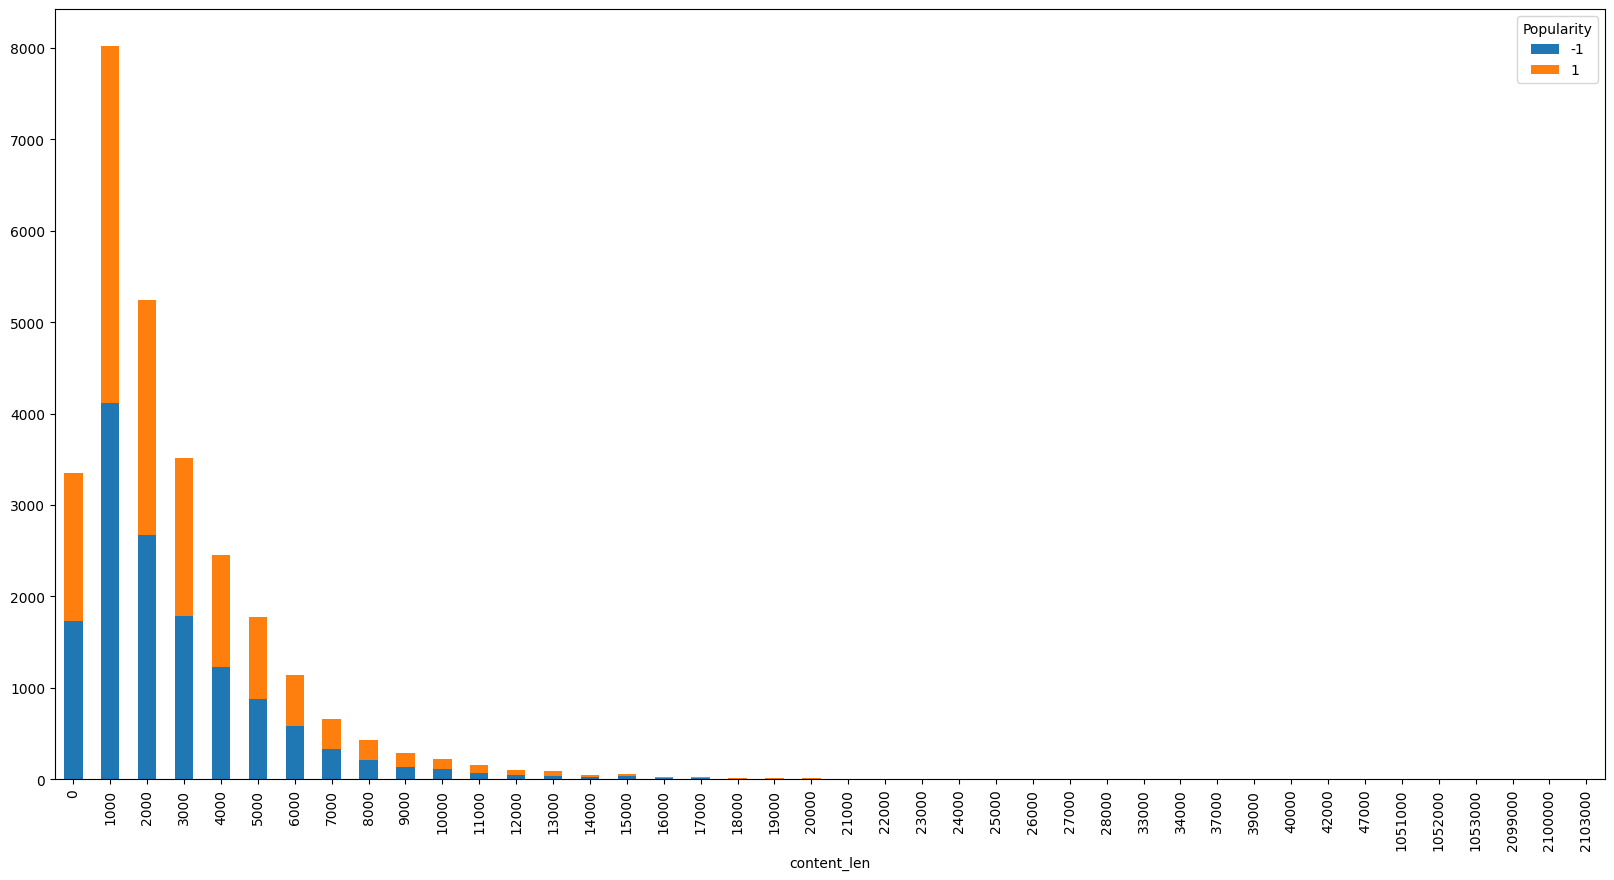

In [15]:
df['content_len'] = df['content_len'] // 1000 * 1000
group = df.groupby(['content_len', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['content_len', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity,-1,1,total
title_bit_count,,,
10,100.0,NaN,1.0
12,100.0,NaN,1.0
13,50.0,50.0,2.0
14,50.0,50.0,4.0
15,50.0,50.0,8.0
...,...,...,...
83,100.0,NaN,1.0
86,NaN,100.0,1.0
88,NaN,100.0,1.0


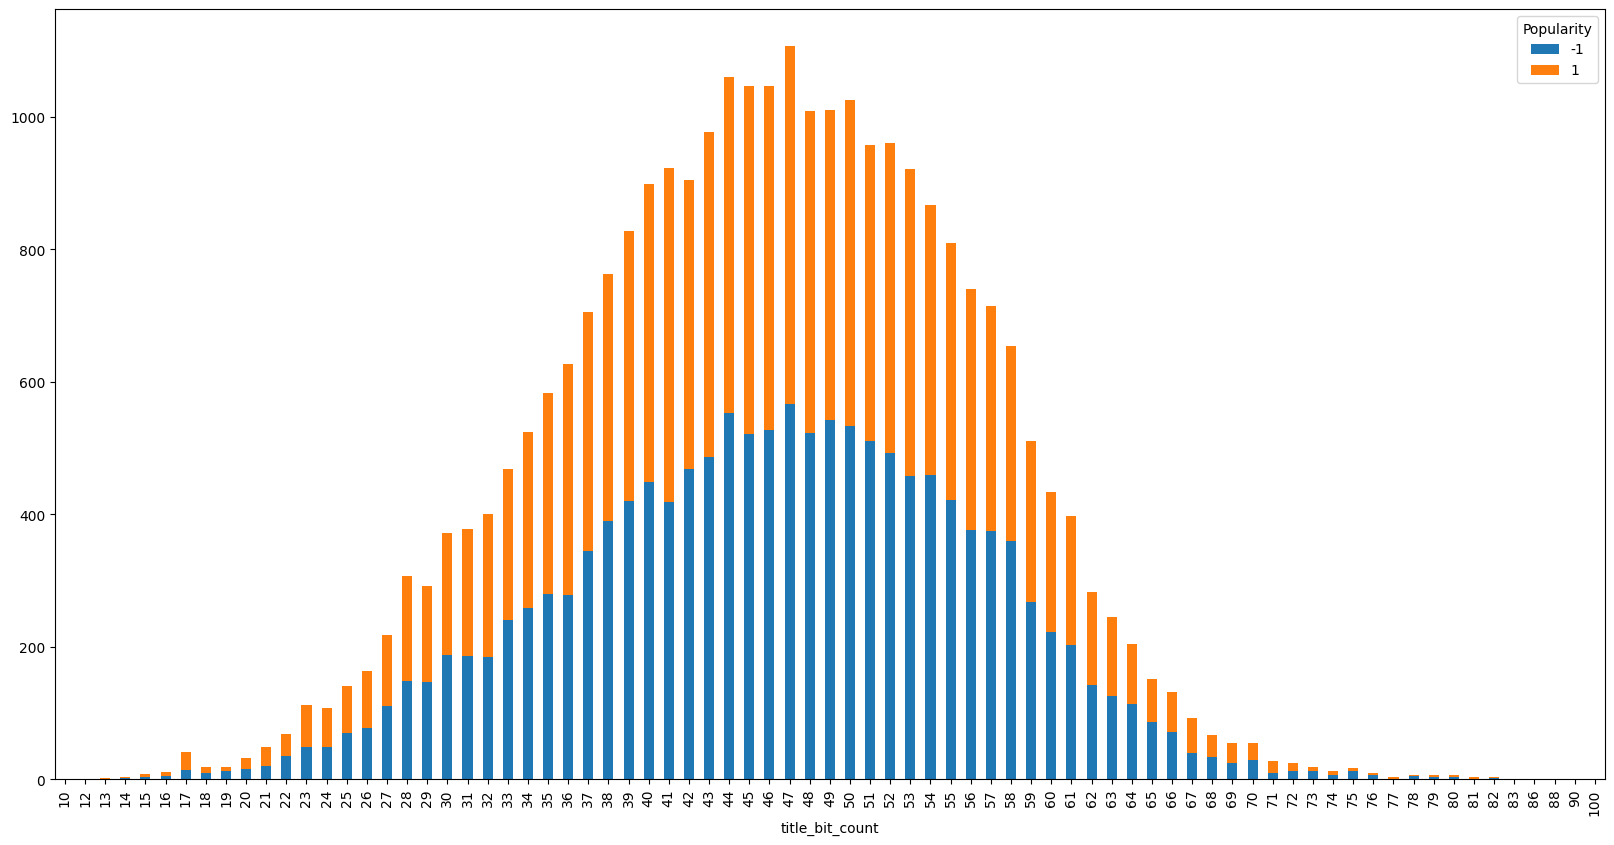

In [18]:
group = df.groupby(['title_bit_count', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['title_bit_count', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
display(group)

Popularity              -1           1   total
channel                                       
advertising      50.831793   49.168207   541.0
apps-software    44.776119   55.223881   335.0
bus             100.000000         NaN     1.0
business         51.889715   48.110285  3228.0
comics                 NaN  100.000000     1.0
conversations    54.545455   45.454545    22.0
dev-design       54.938272   45.061728   162.0
entertainment    52.304025   47.695975  3776.0
film             48.979592   51.020408   441.0
gadgets          47.704082   52.295918   392.0
gaming           52.025586   47.974414   469.0
home             50.000000   50.000000     2.0
how-to           46.590909   53.409091    88.0
howto                  NaN  100.000000     1.0
jobs             50.000000   50.000000     2.0
lifestyle        45.112782   54.887218   665.0
marketing        41.730280   58.269720   393.0
media            55.418719   44.581281   406.0
memes                  NaN  100.000000     2.0
mob          

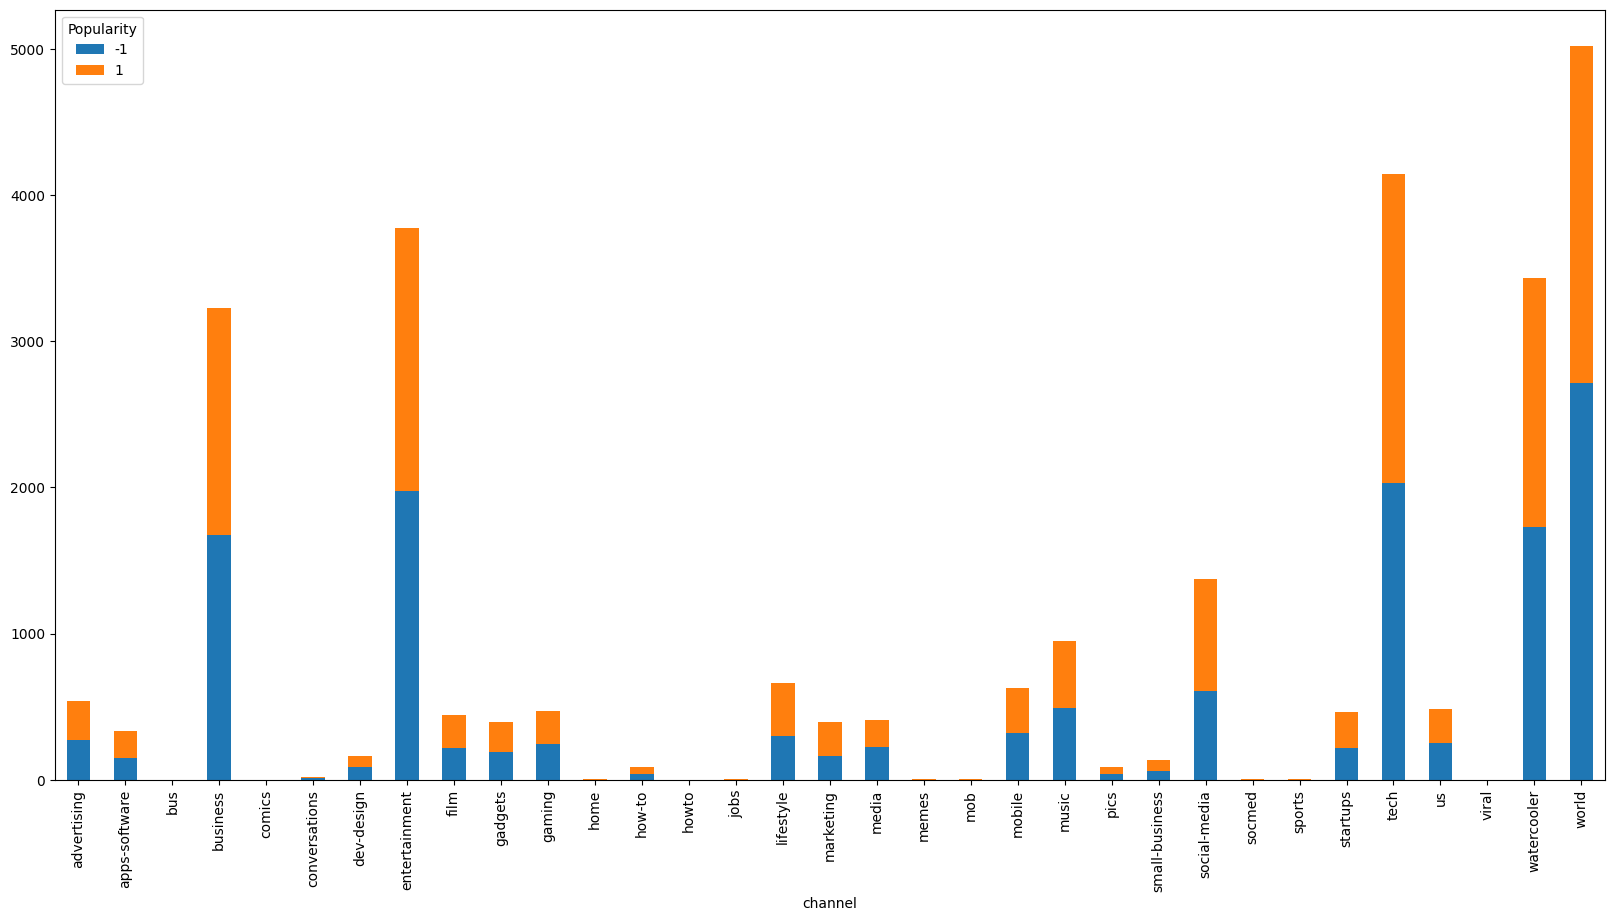

In [5]:
group = df.groupby(['channel', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['channel', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1          1  total
Weekday                                
0           52.753623  47.246377   4485
1           53.968254  46.031746   5040
2           54.594595  45.405405   5180
3           53.494729  46.505271   5122
4           47.103334  52.896666   4229
5           36.811441  63.188559   1888
6           39.434962  60.565038   1699


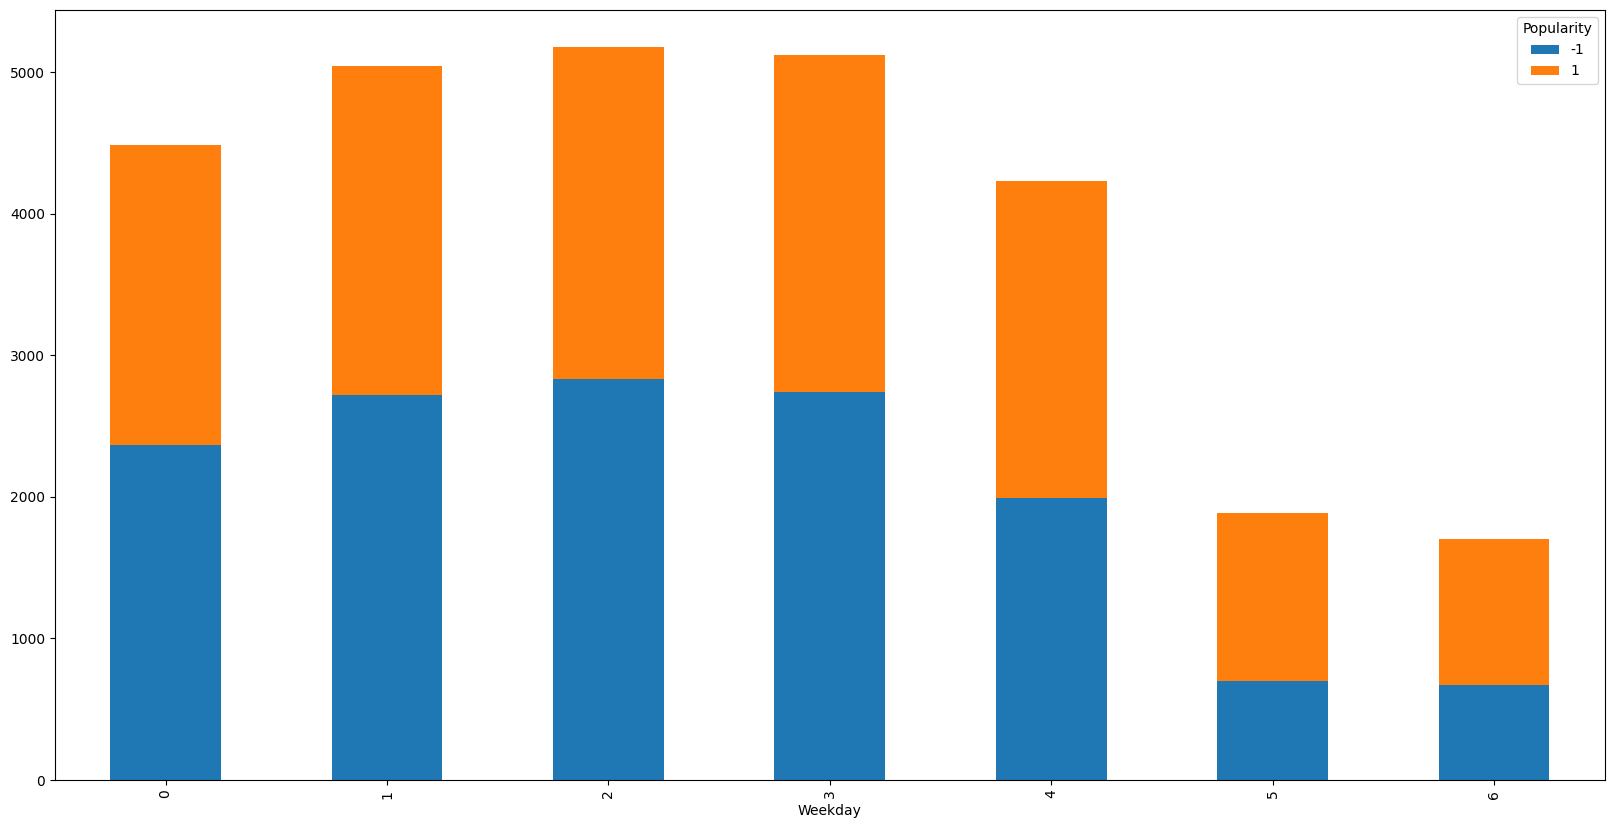

In [6]:
group = df.groupby(['Weekday', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Weekday', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity          -1           1  total
link_count                               
2            50.000000   50.000000    8.0
3            64.285714   35.714286   14.0
4            48.837209   51.162791   43.0
5            45.614035   54.385965  114.0
6            55.893536   44.106464  263.0
...                ...         ...    ...
167                NaN  100.000000    1.0
169                NaN  100.000000    1.0
170         100.000000         NaN    1.0
193                NaN  100.000000    1.0
312                NaN  100.000000    1.0

[131 rows x 3 columns]


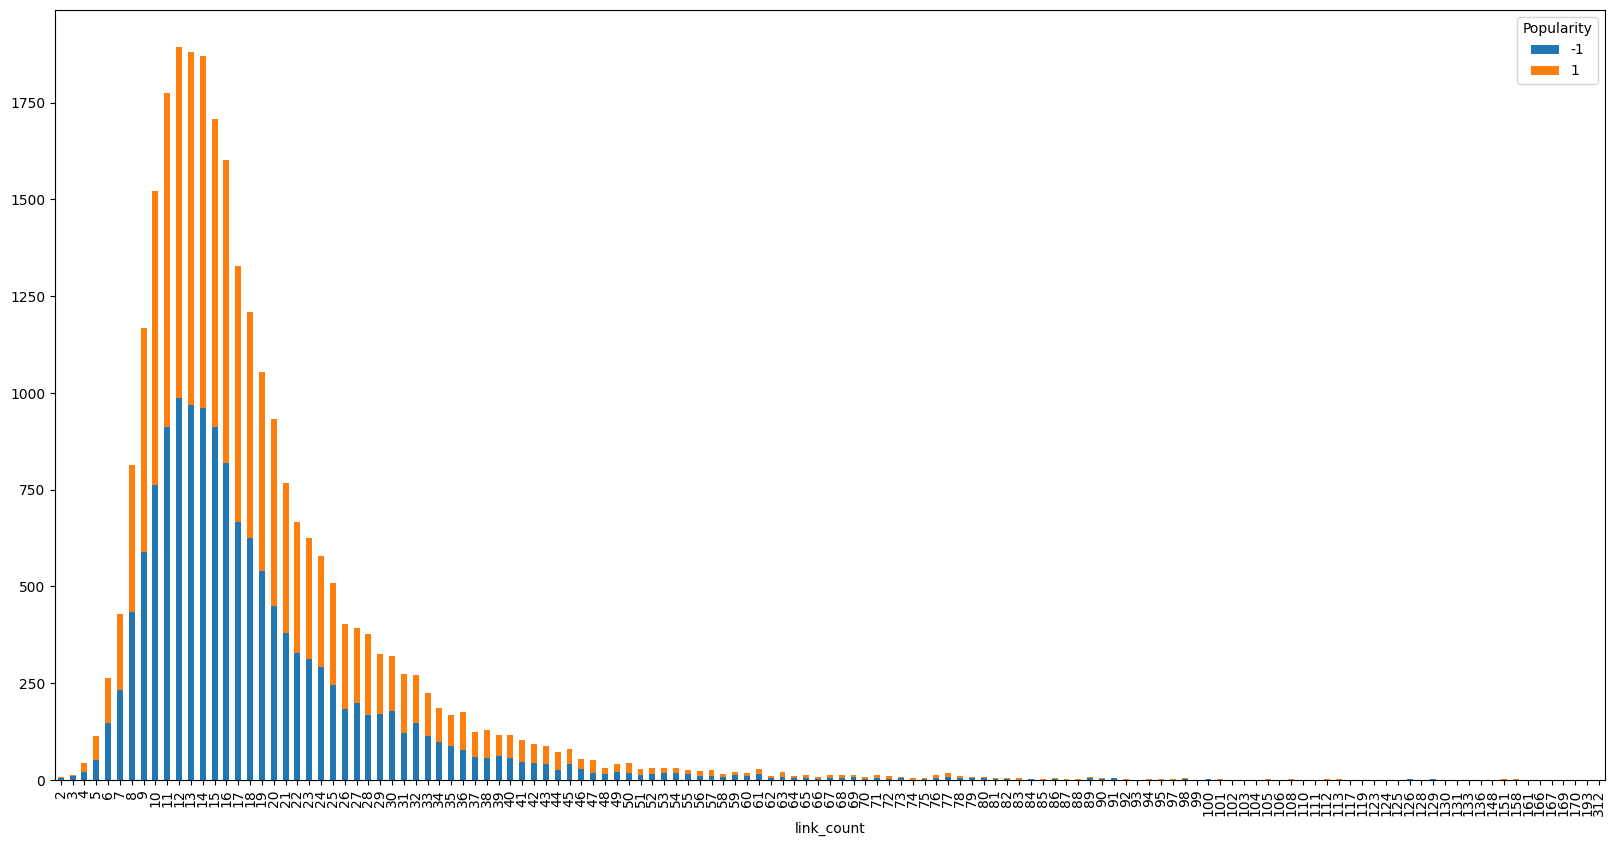

In [7]:
group = df.groupby(['link_count', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['link_count', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity          -1           1   total
img_count                                 
0            57.303371   42.696629   178.0
1            50.786358   49.213642  5659.0
2            51.675362   48.324638  8625.0
3            50.546448   49.453552  3294.0
4            51.558074   48.441926  1765.0
...                ...         ...     ...
101                NaN  100.000000     3.0
102                NaN  100.000000     1.0
103         100.000000         NaN     1.0
109                NaN  100.000000     1.0
112                NaN  100.000000     1.0

[86 rows x 3 columns]


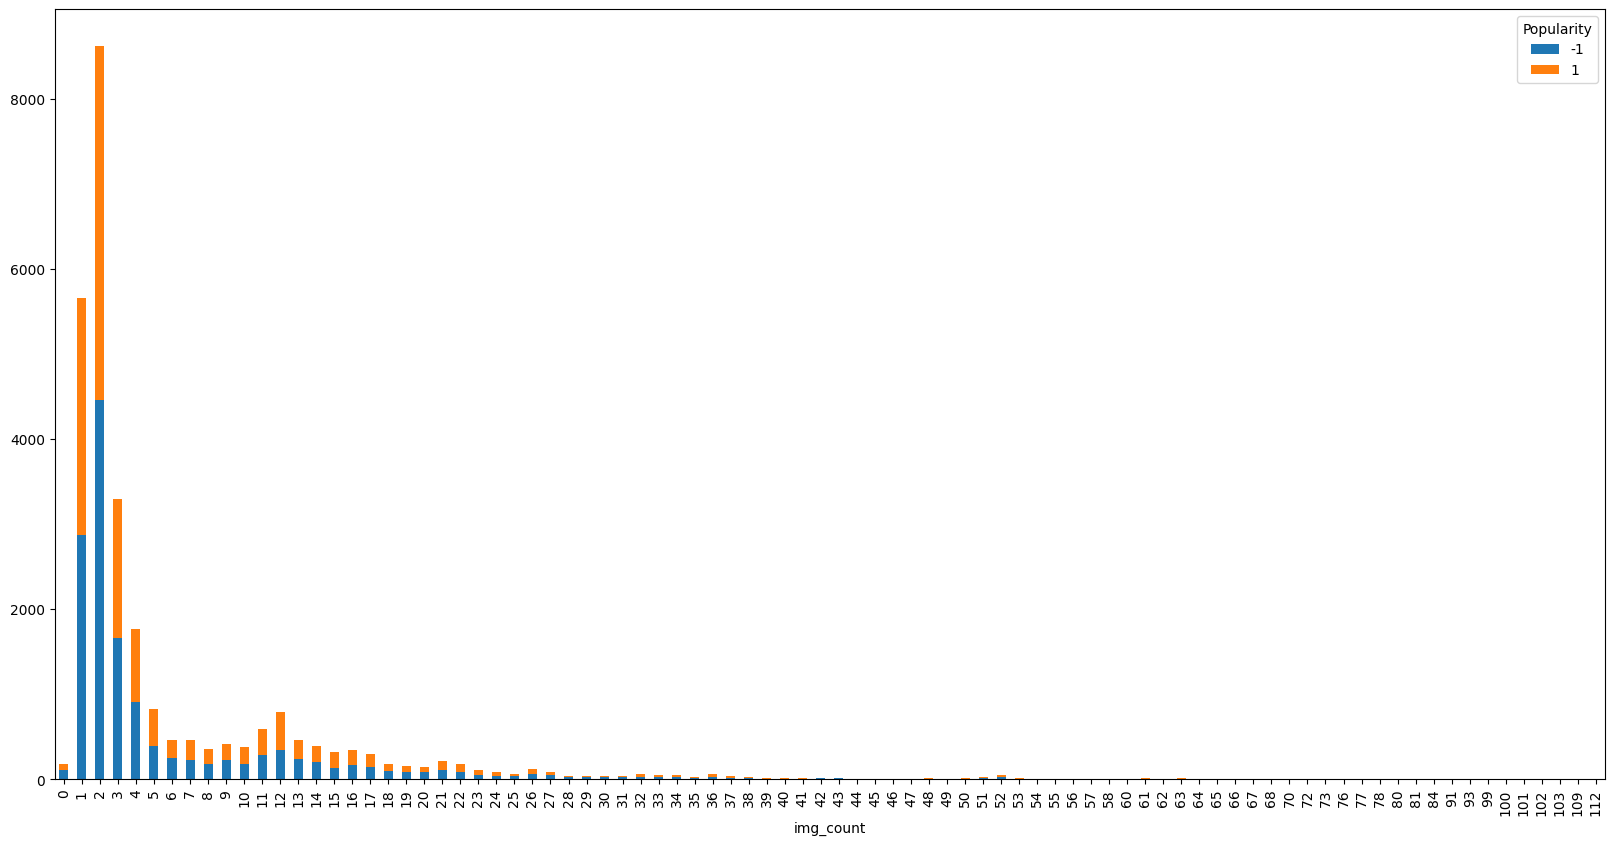

In [8]:
group = df.groupby(['img_count', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['img_count', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity                -1           1   total
categories_count                                
0                  62.068966   37.931034    29.0
1                  50.549451   49.450549    91.0
2                  49.908257   50.091743   545.0
3                  51.664612   48.335388  1622.0
4                  53.339756   46.660244  3114.0
5                  50.459399   49.540601  4027.0
6                  51.079963   48.920037  4352.0
7                  50.732836   49.267164  3889.0
8                  49.682741   50.317259  3152.0
9                  50.285249   49.714751  2454.0
10                 50.708564   49.291436  1623.0
11                 48.115079   51.884921  1008.0
12                 49.613601   50.386399   647.0
13                 52.824859   47.175141   354.0
14                 43.525180   56.474820   278.0
15                 44.936709   55.063291   158.0
16                 55.000000   45.000000    80.0
17                 50.000000   50.000000    80.0
18                 3

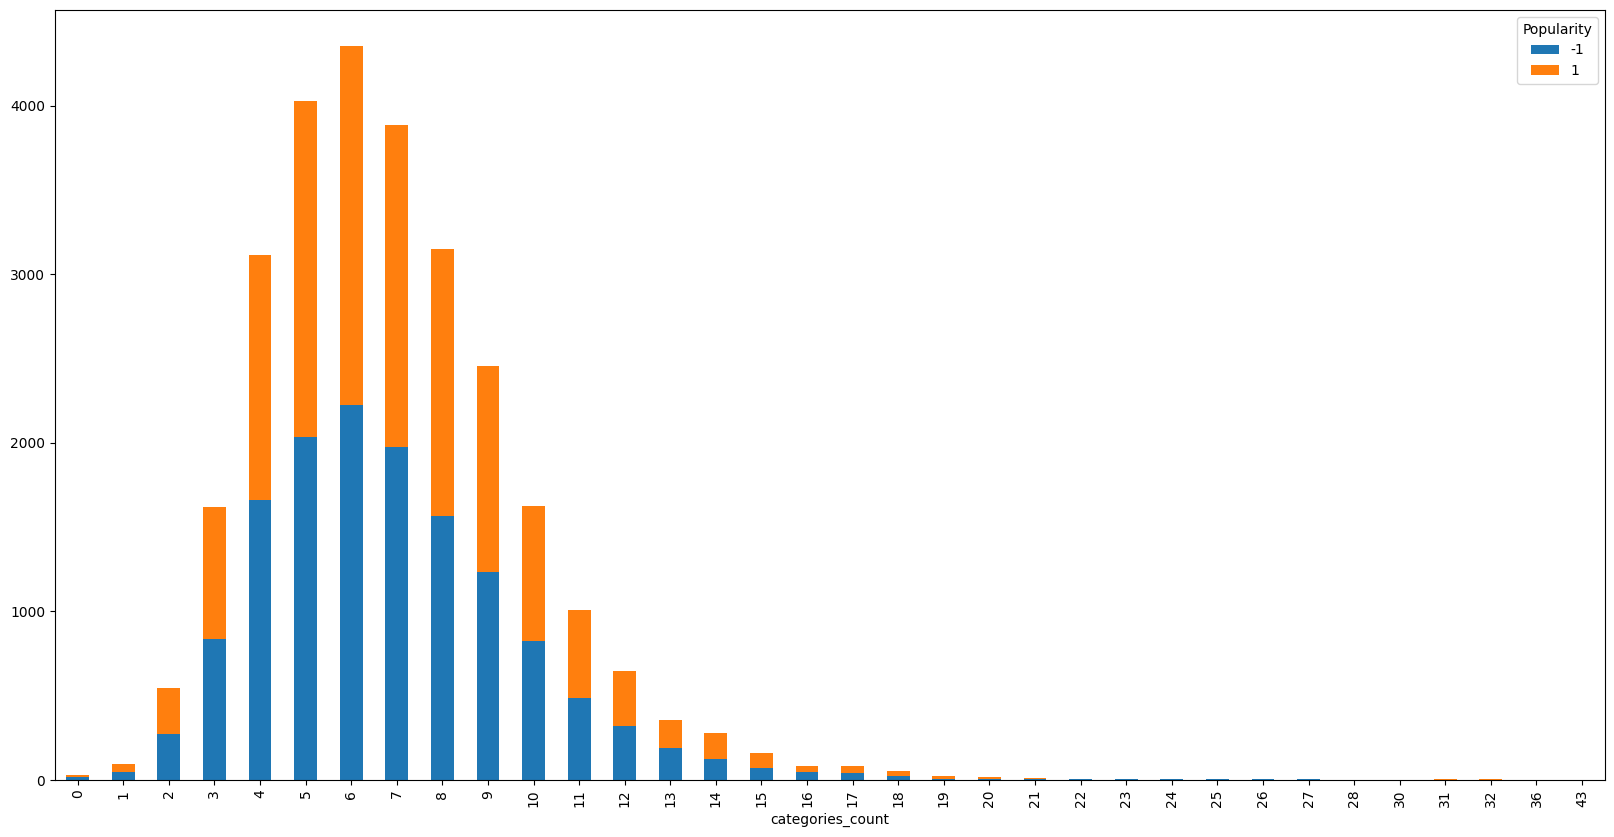

In [9]:
group = df.groupby(['categories_count', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['categories_count', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1          1  total
Month                                  
1           47.546451  52.453549   2099
2           46.732026  53.267974   2142
3           40.892019  59.107981   2130
4           42.851027  57.148973   2336
5           47.486535  52.513465   2228
6           53.424075  46.575925   2351
7           54.394299  45.605701   2526
8           53.375796  46.624204   2355
9           55.918026  44.081974   2391
10          56.884195  43.115805   2651
11          52.887538  47.112462   2303
12          53.120601  46.879399   2131


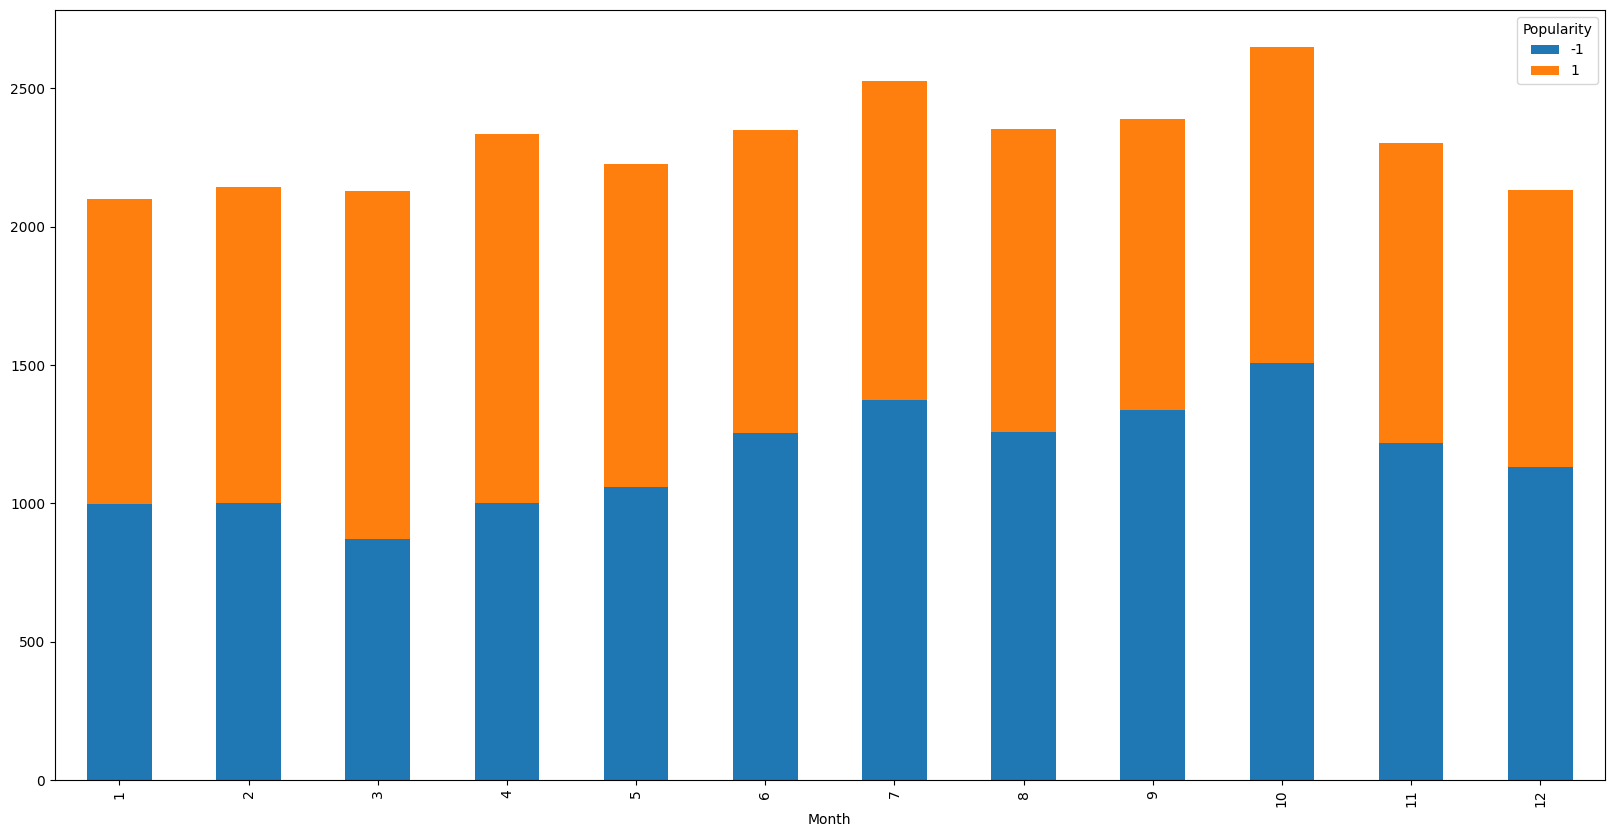

In [10]:
group = df.groupby(['Month', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Month', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1           1    total
Year                                      
2013        49.775041   50.224959  12669.0
2014        51.459293   48.540707  14973.0
2015              NaN  100.000000      1.0


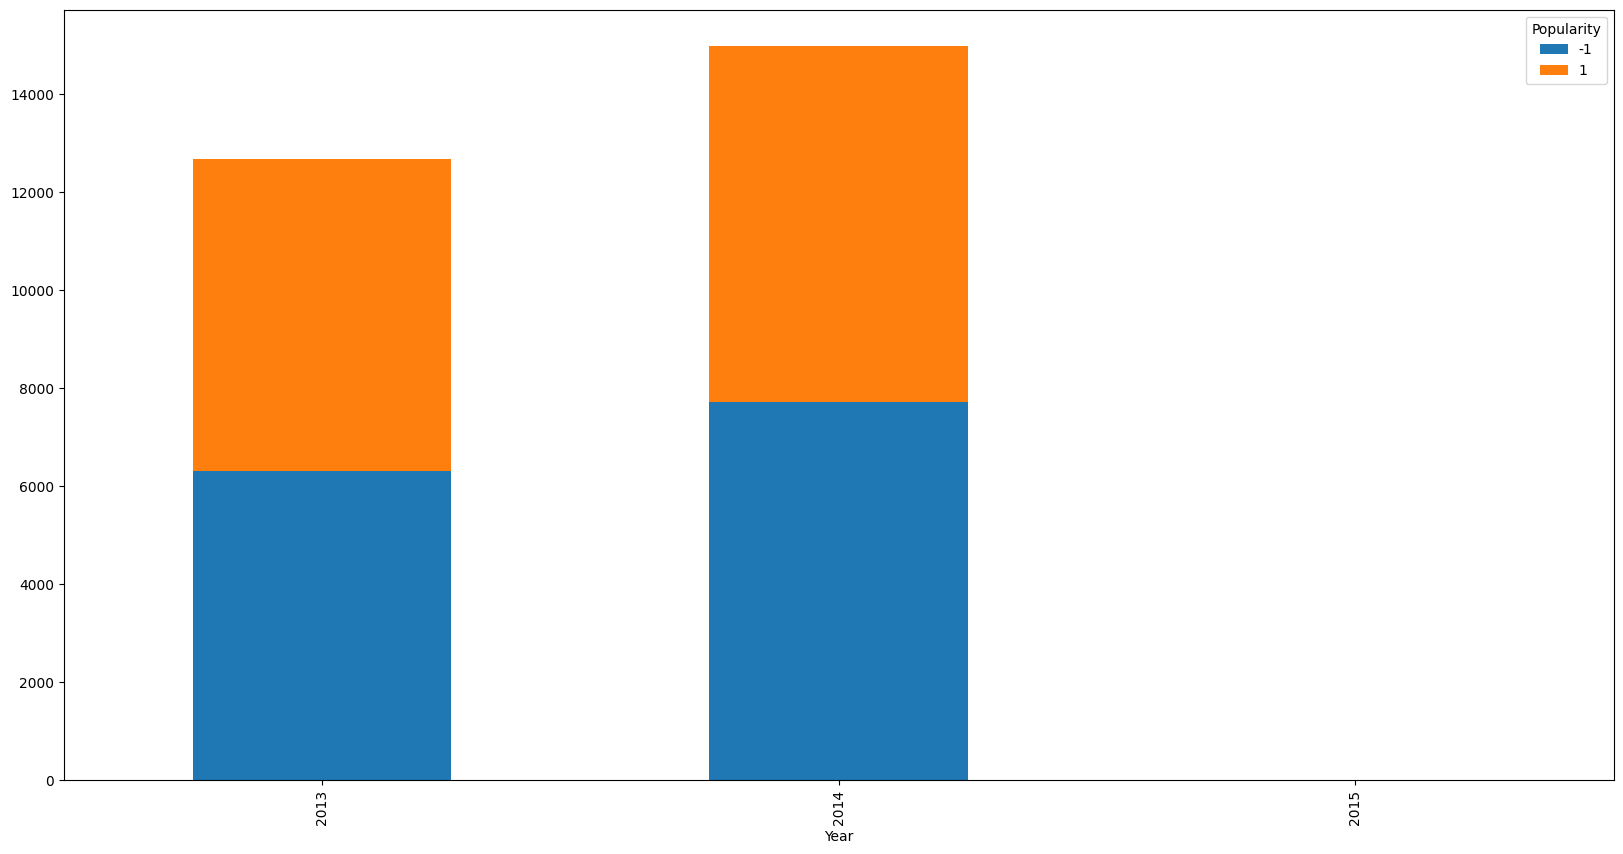

In [11]:
group = df.groupby(['Year', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Year', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1          1  total
Day                                    
1           55.693069  44.306931    808
2           50.746269  49.253731    804
3           50.568182  49.431818    880
4           49.891304  50.108696    920
5           49.509804  50.490196    816
6           48.797251  51.202749    873
7           51.419558  48.580442    951
8           49.945355  50.054645    915
9           49.638803  50.361197    969
10          53.359684  46.640316   1012
11          52.290837  47.709163   1004
12          54.479167  45.520833    960
13          49.727965  50.272035    919
14          53.668763  46.331237    954
15          50.269687  49.730313    927
16          51.345291  48.654709    892
17          52.284803  47.715197    941
18          51.440768  48.559232    937
19          50.645161  49.354839    930
20          47.385984  52.614016    899
21          47.878128  52.121872    919
22          51.900109  48.099891    921
23          50.625000  49.375000    960


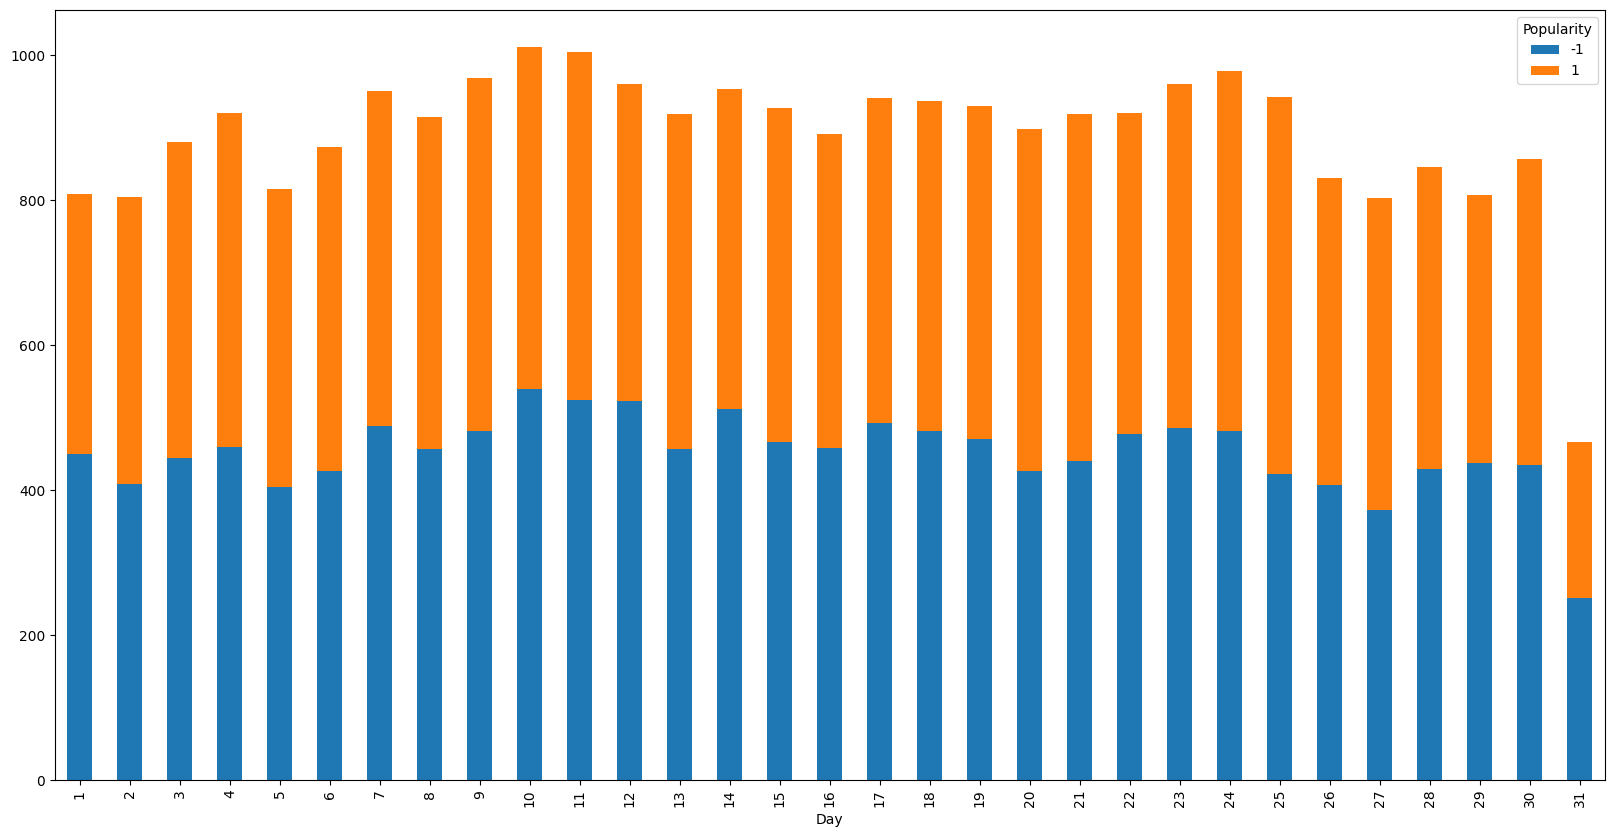

In [12]:
group = df.groupby(['Day', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Day', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1          1  total
Hour                                   
0           51.189343  48.810657   1051
1           50.335570  49.664430    894
2           49.045346  50.954654    838
3           48.413631  51.586369    851
4           46.428571  53.571429    644
5           44.416244  55.583756    394
6           49.258160  50.741840    337
7           47.527473  52.472527    364
8           49.122807  50.877193    342
9           48.372093  51.627907    430
10          50.503597  49.496403    695
11          48.568282  51.431718    908
12          50.665302  49.334698    977
13          53.292960  46.707040   1321
14          51.235294  48.764706   1700
15          49.975927  50.024073   2077
16          52.017937  47.982063   2007
17          52.051282  47.948718   1950
18          52.025250  47.974750   1901
19          51.068376  48.931624   1872
20          50.940355  49.059645   1861
21          51.300665  48.699335   1653
22          52.646436  47.353564   1417


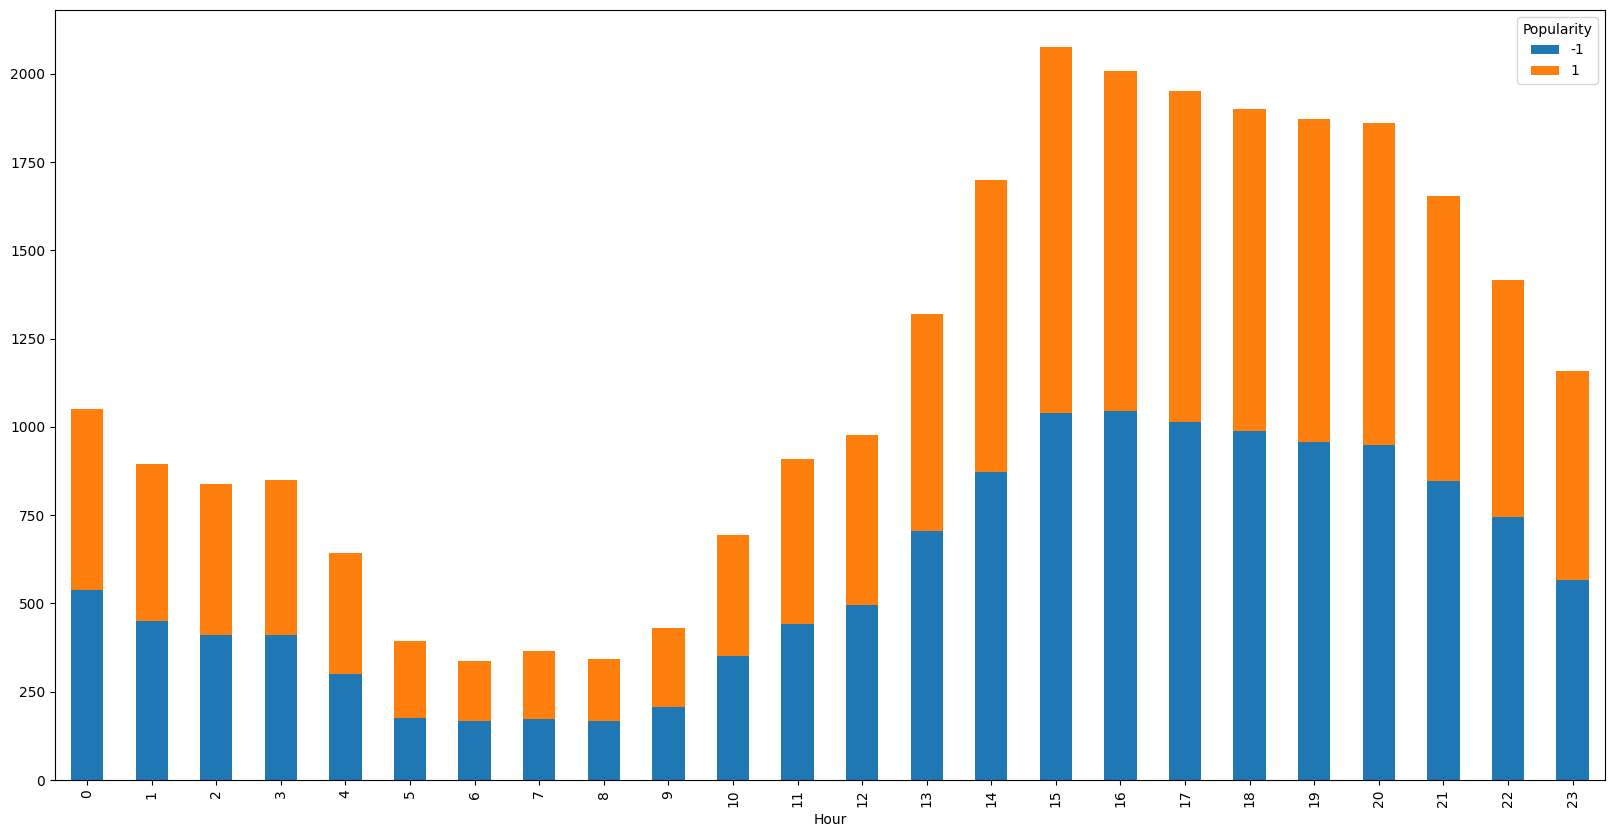

In [13]:
group = df.groupby(['Hour', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Hour', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1          1  total
Minutes                                
0           50.156740  49.843260   2233
1           49.371634  50.628366    557
2           50.988142  49.011858    506
3           48.780488  51.219512    533
4           45.996276  54.003724    537
5           51.941748  48.058252    412
6           47.198276  52.801724    464
7           47.002398  52.997602    417
8           48.029557  51.970443    406
9           46.022727  53.977273    352
10          47.677262  52.322738    409
11          51.116625  48.883375    403
12          52.054795  47.945205    365
13          47.536232  52.463768    345
14          52.393617  47.606383    376
15          50.911641  49.088359    713
16          51.603499  48.396501    343
17          48.710602  51.289398    349
18          55.162242  44.837758    339
19          51.851852  48.148148    324
20          52.445652  47.554348    368
21          57.142857  42.857143    336
22          43.626062  56.373938    353


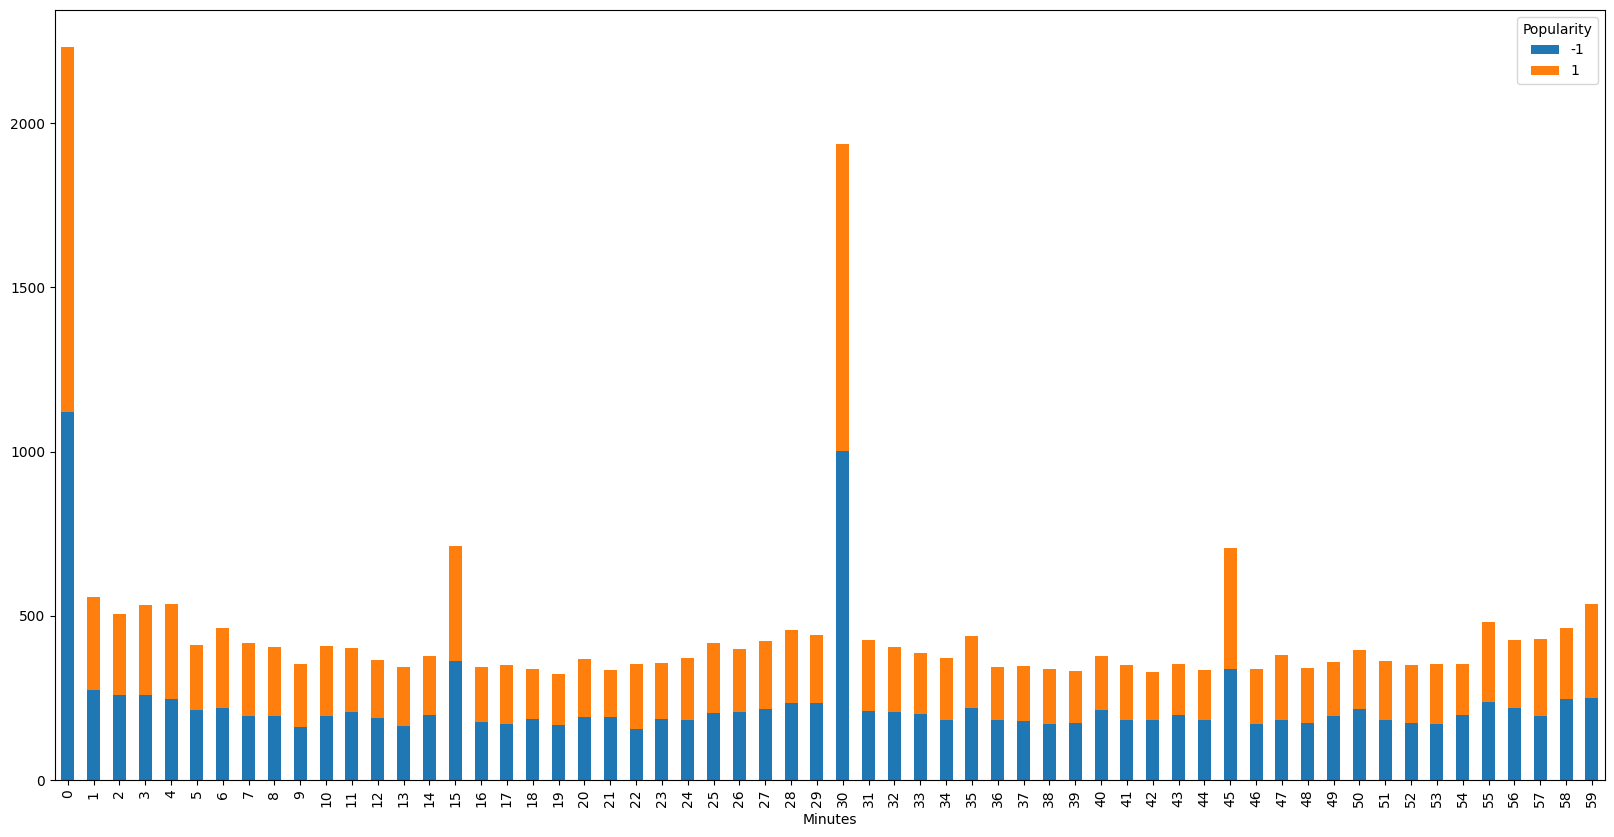

In [14]:
group = df.groupby(['Minutes', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Minutes', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1          1  total
Sec                                    
0           48.373102  51.626898    461
1           50.554324  49.445676    451
2           53.703704  46.296296    486
3           52.371134  47.628866    485
4           52.155172  47.844828    464
5           51.050420  48.949580    476
6           49.680171  50.319829    469
7           51.287554  48.712446    466
8           52.685950  47.314050    484
9           49.339207  50.660793    454
10          46.171171  53.828829    444
11          51.926978  48.073022    493
12          48.072562  51.927438    441
13          50.655022  49.344978    458
14          53.632479  46.367521    468
15          50.434783  49.565217    460
16          47.716895  52.283105    438
17          48.953975  51.046025    478
18          48.036952  51.963048    433
19          49.160671  50.839329    417
20          49.789916  50.210084    476
21          49.680171  50.319829    469
22          50.554324  49.445676    451


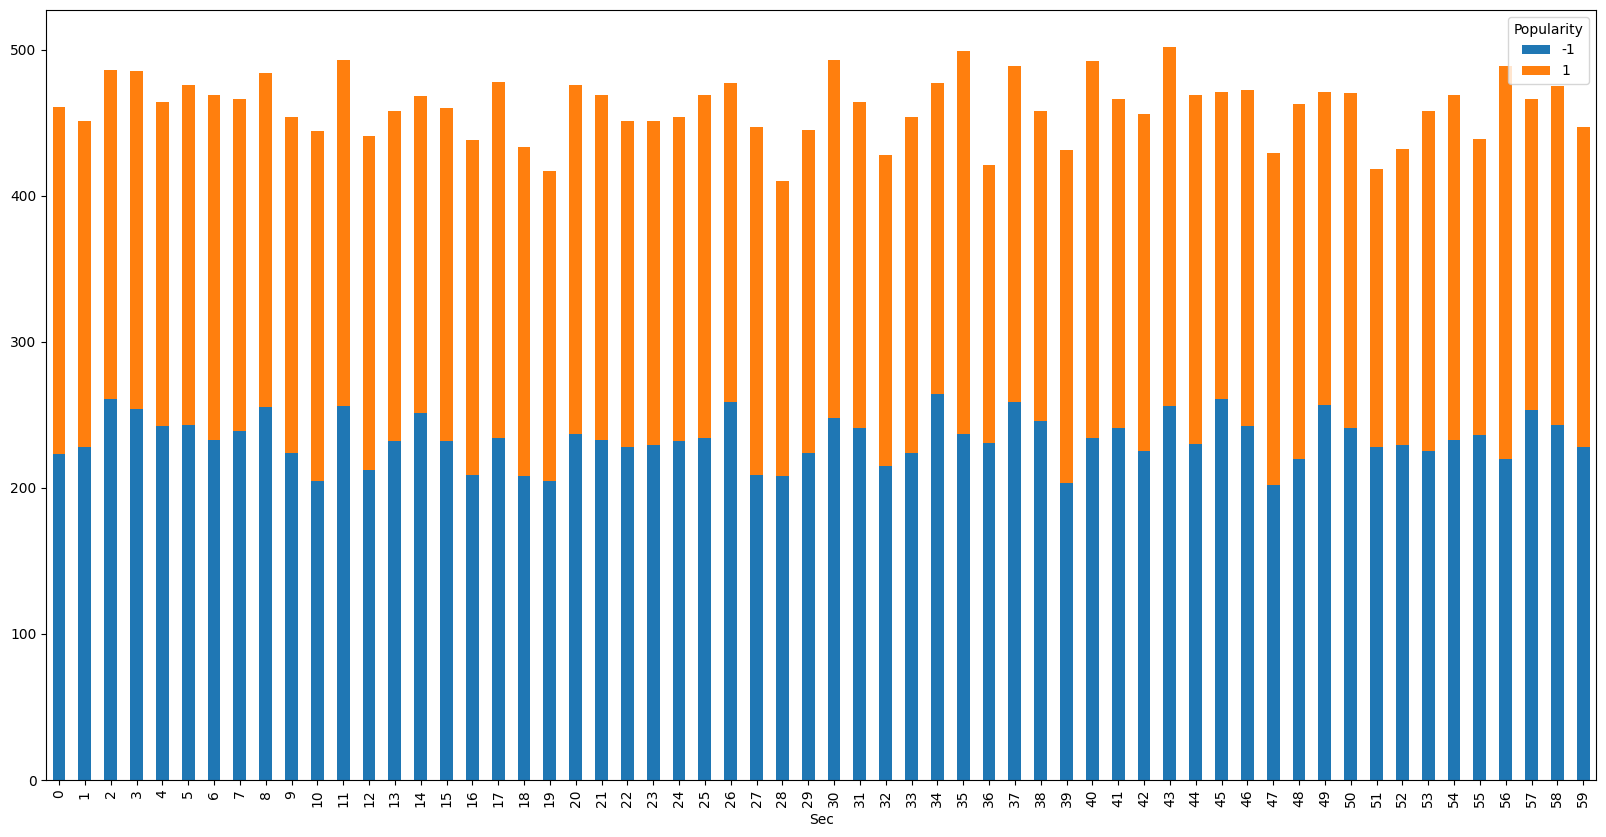

In [15]:
group = df.groupby(['Sec', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Sec', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)

Popularity         -1           1    total
Timezone                                  
UTC         50.738588   49.261412  27011.0
UTC+01:00   46.666667   53.333333     30.0
UTC+02:00   37.500000   62.500000     24.0
UTC+03:00   60.000000   40.000000      5.0
UTC+05:00         NaN  100.000000      1.0
UTC+08:00   33.333333   66.666667     12.0
UTC+10:00   66.666667   33.333333      3.0
UTC+11:00   40.000000   60.000000      5.0
UTC-03:00         NaN  100.000000      1.0
UTC-04:00   50.943396   49.056604    106.0
UTC-05:00   49.382716   50.617284     81.0
UTC-06:00   41.666667   58.333333     24.0
UTC-07:00   49.218750   50.781250    256.0
UTC-08:00   50.000000   50.000000     84.0


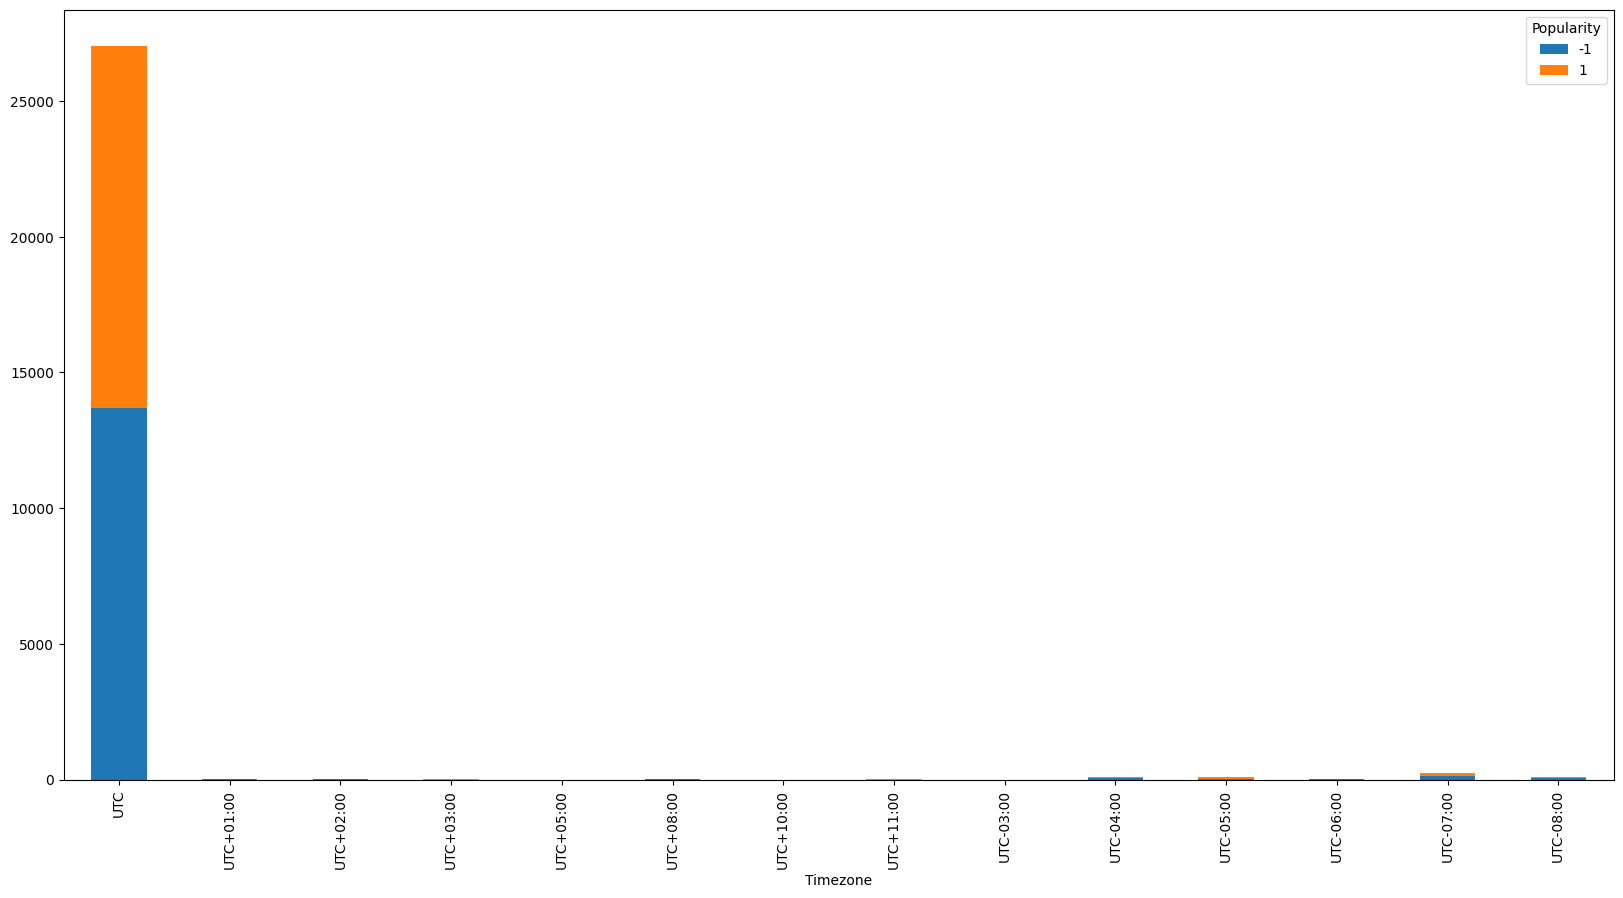

In [16]:
group = df.groupby(['Timezone', 'Popularity']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
group = df.groupby(['Timezone', 'Popularity'])
# print(group.size())
# print(group.size().unstack())
group = group.size().unstack()
# add a extra column called total
tmp = group.copy()
for row in range (0, len(group)):
    group.iloc[row] = group.iloc[row] / group.iloc[row].sum() * 100
group = group.assign(total=tmp.sum(axis=1))
print(group)